In [1]:
%pwd

'/media/data_cifs/jacob'

In [2]:
%cd ~/scripts
%pwd
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import sys
import dataset
from stuf import stuf

/home/jacob/scripts


In [3]:
#Initialize database in working directory to avoid data_cifs permissions issues that arise with SQL databases

db_source = r'/media/data_cifs/irodri15/data/db/leavesdb.db'
working_dir = os.path.expanduser(r'~/scripts')
working_db = os.path.join(working_dir, r'leavesdb.db')

if not os.path.isfile(working_db):
    print(f'Copying sql db file from {db_source} to {working_db}')
    shutil.copyfile(db_source, home_dir)
print(f'Proceeding with sql db at location {working_db}')

Proceeding with sql db at location /home/jacob/scripts/leavesdb.db


In [4]:
db = dataset.connect(f'sqlite:///{working_db}', row_type=stuf)

In [16]:
'''HELPER FUNCTIONS'''
def get_family_names_per_dataset(db):
    '''
    Helper function that returns dataset_families, a list of tuples: [(,),(,),...]
    db = dataset.connect(f'sqlite:///{db_path}', row_type=stuf)
    dataset_families contains tuples of len == 2, where item 0 is a dataset name, and item 1 is a list of strings, one for each family name in the dataset.
    e.g. [('Fossil',['Adoxaceae', 'Anacardiaceae',...]),
            ('PNAS',['Apocynaceae','Betulaceae',...]),
            ...]
    '''
    dataset_families = []
    for dataset in db['dataset'].distinct('dataset'):
        dataset_name = dataset.dataset
        distinct_families = db['dataset'].distinct('family', dataset=dataset_name)
        dataset_families.append((dataset_name, [fam.family for fam in distinct_families]))
    return dataset_families

def get_num_families_per_dataset(db):
    '''
    Helper function similar to get_family_names_per_dataset, but instead of tuple containing (dataset_name, list(family names)), 
    returns the total number of unique families for each dataset.
    Arguments:
        db : open connection to database
        e.g. db = dataset.connect(f'sqlite:///{db_path}', row_type=stuf)
    Return:
        num_families_per_dataset : list(tuples(str,int))
        e.g. [('Fossil',27),
                ('PNAS',19),
                ...]
    '''
    num_families_per_dataset = []
    dataset_families = get_family_names_per_dataset(db)
    for dataset in dataset_families:
        num_families_per_dataset.append((dataset[0], len(dataset[1])))
    return num_families_per_dataset


def summarize_db(db):
    '''
    Combines helper functions to summarize key info about the data in opened database, db.
    '''
    print("database column keys:\n", db['dataset'].columns)
    print('Number of distinct families:\n',get_num_families_per_dataset(db))
    print(f"Number of rows in db:\n {len(db['dataset'])}")
    

In [17]:
summarize_db(db)

database column keys:
 ['id', 'specie', 'genus', 'path', 'family', 'dataset']
Number of distinct families:
 [('Fossil', 27), ('Leaves', 376), ('PNAS', 19), ('plant_village', 3)]
Number of rows in db:
 119084


In [13]:
get_family_names_per_dataset(db)[2][1]

['Anacardiaceae',
 'Annonaceae',
 'Apocynaceae',
 'Betulaceae',
 'Celastraceae',
 'Combretaceae',
 'Ericaceae',
 'Fabaceae',
 'Fagaceae',
 'Lauraceae',
 'Malvaceae',
 'Melastomataceae',
 'Myrtaceae',
 'Passifloraceae',
 'Phyllanthaceae',
 'Rosaceae',
 'Rubiaceae',
 'Salicaceae',
 'Sapindaceae']

In [20]:
def load_fossil_data(db, dataset_name='Fossil'):
    paths_labels = db['dataset'].distinct('path','family', dataset=dataset_name)
    return paths_labels

data = load_fossil_data(db)

print(len(list(data)))

6122


In [55]:
# db['dataset'].count('family')
dataset_name = "PNAS"

query_str = 'SELECT dataset.path, dataset.family, dataset.dataset FROM dataset WHERE dataset.dataset = {}'.format("PNAS")

data = db.query(query_str)#'"PNAS"')

OperationalError: (sqlite3.OperationalError) no such column: PNAS
[SQL: SELECT dataset.path, dataset.family, dataset.dataset FROM dataset WHERE dataset.dataset = PNAS]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [53]:
print(len(list(data)))

#print(next(data))

5314


In [31]:
print(f"Number of rows in db = {len(db['dataset'])}")

Number of rows in db = 119084


In [33]:
print(list(db['dataset'].distinct('dataset')))

[OrderedDict([('dataset', 'Fossil')]), OrderedDict([('dataset', 'Leaves')]), OrderedDict([('dataset', 'PNAS')]), OrderedDict([('dataset', 'plant_village')])]


In [79]:
fossil = db['dataset'].distinct('genus',dataset='Fossil')

In [94]:
paths_w_labels = []
dataset = 'Fossil'

for dataset in db['dataset'].distinct('dataset'):
    distinct_families = db['dataset'].distinct('path','family', dataset=dataset_name)

samples = list(distinct_families)
    
print(len(samples))
    
    
sample = next(distinct_families)

sample_tpl = (sample.path, sample.family)
print(sample_tpl)

6129


StopIteration: 

Text(0.5, 1.0, 'Rosacea')

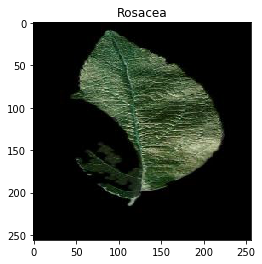

In [92]:
img = cv2.imread(sample_tpl[0])

plt.imshow(img)
plt.title(sample_tpl[1])



In [57]:
from skimage import data
import napari

with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(data.astronaut(), name='astronaut')
    viewer.add_image(data.moon(), name='moon')
    viewer.add_image(data.camera(), name='camera')

ModuleNotFoundError: No module named 'skimage'

In [63]:
[print(i.genus + ',\n') for i in db['dataset'].distinct('genus', dataset='Fossil')]

Acer,

Adiantites,

Amelanchier,

Anacardiaceae,

Archaeomnium,

Aristolochia,

Aspidium,

Aster,

Astronium,

Athyana,

Bauhinia,

Bohlenia,

Bursera,

Caesalpinites,

Cardiospermum,

Carya,

Castanea,

Cedrela,

Cedrelospermum,

Celastrinites,

Celastrus,

Celtis,

Cercis,

Cercocarpus,

Chamaecyparis,

Colubrina,

Convolvulites,

Conzattia,

Cotinus,

Crataegus,

Cupressaceae,

Cyperacites,

Daphne,

Dipteronia,

Dodonaea,

Dryopteris,

Eugenia,

Euphorbia,

Fabaceae,

Fagara,

Fagopsis,

Ficus,

Florissantia,

Fontinalis,

Ginkgo,

Halesia,

Holodiscus,

Humulus,

Hydrangea,

II.,

Ilex,

Juglandaceae,

Koelreuteria,

Leguminosites,

Lemna,

Limnobiophyllum,

Lindera,

Lomatia,

Lomatites,

Mahonia,

Malus,

Melica,

Melothria,

Mimosites,

Morus,

Myrica,

Myrsine,

Nepta,

Oreopanax,

Osmanthus,

Osmylidia,

Pachistima,

Panax,

Paracarpinus,

Parthenocissus,

Pellea,

Persea,

Phaseolites,

Philadelphus,

Pimelea,

Pinus,

Plagiopodopsis,

Planera,

Populites,

Populus,

Prosopi

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
fossil = list(fossil)
print(len(fossil))

14437


In [43]:
dir(fossil[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build',
 '_classkeys',
 '_map',
 '_mapping',
 '_new',
 '_pop',
 '_postpop',
 '_prepop',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [47]:
fossil[0].items()

dict_items([('id', 5315), ('specie', 'newtoni'), ('genus', 'Sambucus'), ('path', '/media/data_cifs/sven2/leaves/sorted/Fossils_DataSource/New_Fossil_Dataset/I. Approved families/Adoxaceae/Sambucus newtoni/FLFO_002492A Sambucus newtoni.tif'), ('family', 'Adoxaceae'), ('dataset', 'Fossil')])

In [50]:
for f in fossil[:10]:
    print(f.family, f.genus, f.specie)

Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
Adoxaceae Sambucus newtoni
